In [ ]:
"""Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

    Frequency Tables:
        Generate a frequency table for the product category.
        Which are the top 5 most listed product categories?

    Visualizations:
        Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart,
        do it for a subset of top categories.
        For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?"""


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [5]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv('/Users/benoi/Documents/IronHack/Week_5/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [11]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [15]:
df.shape

(2443651, 9)

In [41]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [33]:
frequency_table = df['category'].value_counts()
proportion_table = df['category'].value_counts(normalize=True).round(2)*100
frequency_table.head(5) #display the top 5 product categories
# there is a very large gap between top1 and top2 in the frequency table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [35]:
proportion_table.head(5) #display the top 5 product categories in %

category
Sports & Outdoors                         34.0
Beauty                                     1.0
Handmade Clothing, Shoes & Accessories     1.0
Bath & Body                                1.0
Birthday Gifts                             1.0
Name: proportion, dtype: float64

C:\Users\benoi\AppData\Local\Temp\ipykernel_17148\2623165280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index, y=top_5.values, palette="Set3")


<Axes: xlabel='category'>

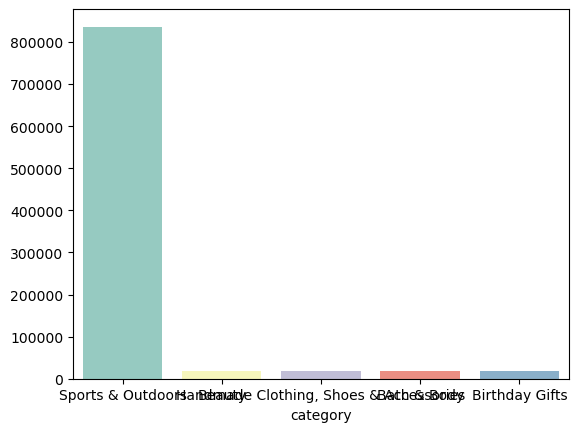

In [45]:
top_5 = frequency_table.nlargest(5)
sns.barplot(x=top_5.index, y=top_5.values, palette="Set3") #display a bar chart for the top 5 categories

<Axes: ylabel='count'>

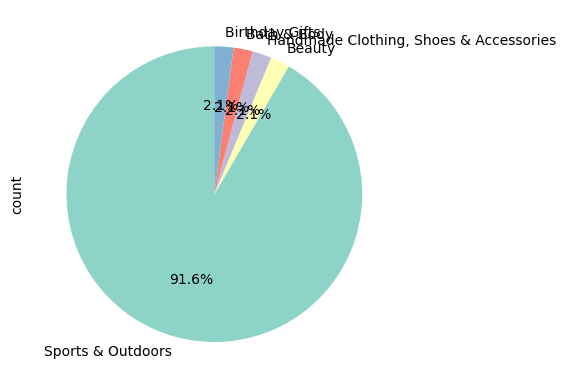

In [56]:
top_5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3")) #display a pie chart of the top 5 categories
#category sport & outdoors is by far the largest representing 91.6% of the top 5 categories

In [ ]:
"""Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

    Measures of Centrality:
        Calculate the mean, median, and mode for the price of products.
        What's the average price point of products listed? How does this compare with the most common price point (mode)?

    Measures of Dispersion:
        Determine the variance, standard deviation, range, and interquartile range for product price.
        How varied are the product prices? Are there any indicators of a significant spread in prices?

    Visualizations:
        Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
        If its hard to read these diagrams, think why this is, and explain how it could be solved..
        Are there products that are priced significantly higher than the rest? 
        Use a box plot to showcase the spread and potential outliers in product pricing."""


In [74]:
df['price'].mean().round(2) #calculate mean for price / AVERAGE price

89.24

In [78]:
df['price'].median() #calculate median for price / MIDDLE VALUE

19.09

In [80]:
df['price'].mode() #calculate mode for price / MOST COMMON

0    9.99
Name: price, dtype: float64

In [ ]:
#average price at 89.2 is much higher than mode at 9.99 => suggests outliers

In [96]:
pd.set_option('display.float_format', '{:.2f}'.format)
df['price'].describe()

count   2443651.00
mean         89.24
std         345.61
min           0.00
25%           9.99
50%          19.09
75%          45.99
max      100000.00
Name: price, dtype: float64

In [102]:
np.var(df['price'])

119445.43644263712

In [ ]:
#comments
#the variance 
#median price is 19.09, which is much lower than the mean of 89.24. 
#it suggests that the data is positively skewed—there are a few very high values that are pulling the mean up
#while the majority of prices are below the mean
#standard deviation of 345.6 also suggest a large dispersion of data and extreme outliers with max 100000

<Axes: xlabel='price', ylabel='Count'>

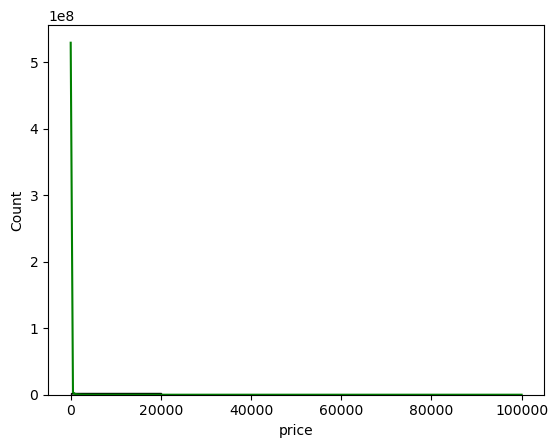

In [136]:
#histogram for distribution of product price

sns.histplot(df['price'], kde=True, bins=5, color="green")


<Axes: ylabel='price'>

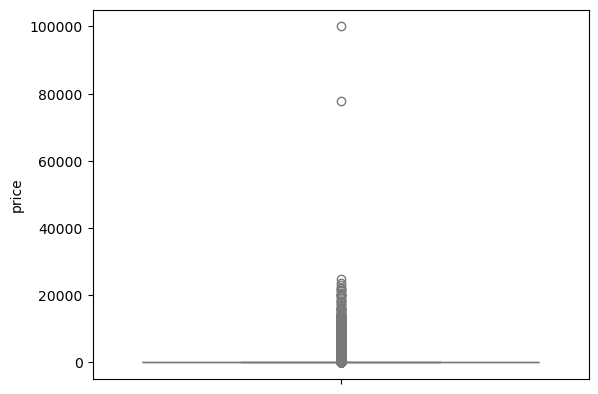

In [118]:
sns.boxplot(data = df['price'], color="lightblue")

In [ ]:
# 2 products are price significantly higher than the rest at 80K and 100K

In [ ]:
#it is very difficult to read the visualizations due to the presence of heavy outliers
#they could be removed for better readability

In [ ]:
"""Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

    Measures of Centrality:
        Calculate the mean, median, and mode for the rating of products.
        How do customers generally rate products? Is there a common trend?

    Measures of Dispersion:
        Determine the variance, standard deviation, and interquartile range for product rating.
        Are the ratings consistent, or is there a wide variation in customer feedback?

    Shape of the Distribution:
        Calculate the skewness and kurtosis for the rating column.
        Are the ratings normally distributed, or do they lean towards higher or lower values?

    Visualizations:
        Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?"""


In [158]:
#mesures of centrality
print("Max: ",df['stars'].max())
print("Min: ",df['stars'].min())
print("Mean: ",df['stars'].mean().round(2))
print("Median: ",df['stars'].median())
print("Mode: ",df['stars'].mode()[0])

Max:  5.0
Min:  0.0
Mean:  2.15
Median:  0.0
Mode:  0.0


In [164]:
proportion = df['stars'].value_counts(normalize=True).round(2)*100
proportion.head(10)

stars
0.00   50.00
4.50    6.00
4.60    6.00
4.40    6.00
5.00    5.00
4.30    5.00
4.70    4.00
4.20    4.00
4.00    3.00
4.10    3.00
Name: proportion, dtype: float64

In [ ]:
#comments on centrality
#ratings range from 0 to 5
#we observe a large proportion (50% of occurences) with rating=0 (equivalent to no rating?) bringing the mean and mode to 0

In [168]:
#mesures of dispersion
print("Mean: ",df['stars'].mean().round(2))
print("Var: ",np.round(df['stars'].var(), 2))
print("Std: ",np.round(df['stars'].std(),2))


Mean:  2.15
Var:  4.82
Std:  2.19


In [174]:
quartiles = df['stars'].quantile([0.25, 0.5, 0.75,1])
quartiles

0.25   0.00
0.50   0.00
0.75   4.40
1.00   5.00
Name: stars, dtype: float64

In [186]:
print("skew: ", df['stars'].skew().round(4))
print("Kurtosis: ", df['stars'].kurtosis().round(4))

skew:  0.0812
Kurtosis:  -1.926


<Axes: xlabel='stars', ylabel='Count'>

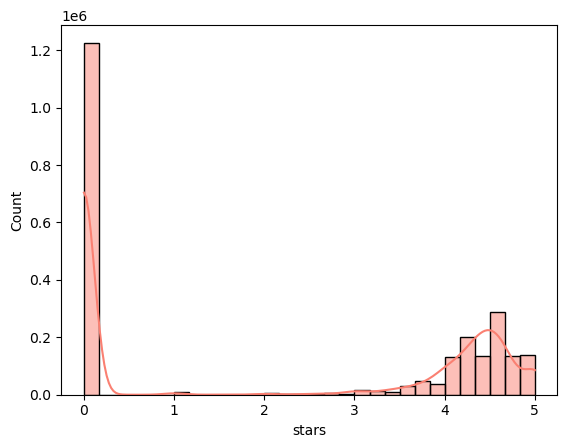

In [188]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

In [ ]:
#comments
#rating =o is an enormous outlier
#for the rest, the rating is mainly grouped around the 4-5 mark
#excluding the outlier=0, the rest of the distribution shows a left (negative) skew